In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# I'm using the recent release of sklearn
#!pip install scikit-learn --upgrade --user

In [3]:
#to plot decision tree
#!pip install graphviz --user
import graphviz

In [4]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

Analyze the Hosmer & Lemeshow low birth weight data using machine learning technique you learned in class

In [6]:
data=pd.read_excel('../data/birth_weight.xlsx')

In [7]:
data.head()

,identification code,birthweight<2500g,age of mother,weight at last menstrual period,race,smoked during pregnancy,premature labor history (count),has history of hypertension,"presence, uterine irritability",number of visits to physician during 1st trimester,birthweight (grams)
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


In [8]:
data.columns=['id', 'baby_low_weight', 'mom_age', 'mom_weight', 'race', 'smoked', 'premature_labor', 'hyptertension', 'irritability', 'doc_visit', 'baby_weight']

# We are interested in what factors affect baby birth weight

In [9]:
data.head()

,id,baby_low_weight,mom_age,mom_weight,race,smoked,premature_labor,hyptertension,irritability,doc_visit,baby_weight
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


In [10]:
X = data[['mom_weight']]
y = data['baby_weight']

In [11]:
dtree = tree.DecisionTreeRegressor().fit(X, y)

In [12]:
yfit = dtree.predict(X)

In [13]:
resd = y - yfit

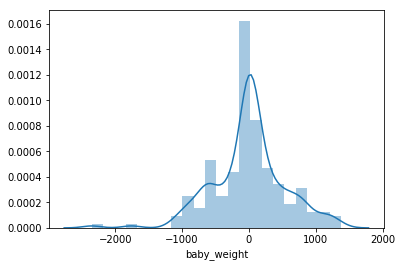

In [14]:
sns.distplot(resd)

In [15]:
r2_score(y, yfit)

0.4491561235257697

In [16]:
print(tree.export_graphviz(dtree, feature_names=X.columns))

digraph Tree {
node [shape=box] ;
0 [label="mom_weight <= 109.5\nmse = 528652.373\nsamples = 189\nvalue = 2944.286"] ;
1 [label="mom_weight <= 89.5\nmse = 308199.377\nsamples = 42\nvalue = 2549.833"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mom_weight <= 87.0\nmse = 335024.25\nsamples = 4\nvalue = 2207.5"] ;
1 -> 2 ;
3 [label="mom_weight <= 82.5\nmse = 436362.889\nsamples = 3\nvalue = 2258.333"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 1\nvalue = 2211.0"] ;
3 -> 4 ;
5 [label="mse = 652864.0\nsamples = 2\nvalue = 2282.0"] ;
3 -> 5 ;
6 [label="mse = 0.0\nsamples = 1\nvalue = 2055.0"] ;
2 -> 6 ;
7 [label="mom_weight <= 95.5\nmse = 291741.167\nsamples = 38\nvalue = 2585.868"] ;
1 -> 7 ;
8 [label="mom_weight <= 94.5\nmse = 351306.076\nsamples = 12\nvalue = 2843.917"] ;
7 -> 8 ;
9 [label="mom_weight <= 90.5\nmse = 256991.0\nsamples = 6\nvalue = 2568.0"] ;
8 -> 9 ;
10 [label="mse = 3640.889\nsamples = 3\nvalue = 3033.333"] ;
9 -> 10 ;
11 [label="mom_weight <=

### Train a decision tree with many features

In [17]:
data.head()

,id,baby_low_weight,mom_age,mom_weight,race,smoked,premature_labor,hyptertension,irritability,doc_visit,baby_weight
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


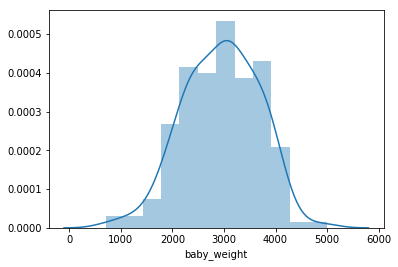

In [72]:
sns.distplot(data.baby_weight)

In [29]:
len(data)

189

In [22]:
y=data['baby_weight']

In [24]:
X=data[['mom_age','mom_weight','race','smoked','premature_labor','hyptertension','irritability','doc_visit']]

In [27]:
X=pd.get_dummies(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

In [31]:
len(X_train)

160

In [32]:
len(X_test)

29

In [66]:
dtree = tree.DecisionTreeRegressor(max_features=7, max_leaf_nodes=5).fit(X_train, y_train)

In [67]:
print(tree.export_graphviz(dtree, feature_names=X.columns))

digraph Tree {
node [shape=box] ;
0 [label="irritability <= 0.5\nmse = 512178.194\nsamples = 160\nvalue = 2965.862"] ;
1 [label="mom_weight <= 109.5\nmse = 473818.827\nsamples = 136\nvalue = 3045.934"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="mse = 233889.581\nsamples = 22\nvalue = 2516.318"] ;
1 -> 3 ;
4 [label="hyptertension <= 0.5\nmse = 455544.612\nsamples = 114\nvalue = 3148.14"] ;
1 -> 4 ;
5 [label="mom_age <= 40.5\nmse = 412090.585\nsamples = 107\nvalue = 3193.224"] ;
4 -> 5 ;
7 [label="mse = 385234.274\nsamples = 106\nvalue = 3176.274"] ;
5 -> 7 ;
8 [label="mse = 0.0\nsamples = 1\nvalue = 4990.0"] ;
5 -> 8 ;
6 [label="mse = 613786.857\nsamples = 7\nvalue = 2459.0"] ;
4 -> 6 ;
2 [label="mse = 487338.859\nsamples = 24\nvalue = 2512.125"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


In [68]:
yfit = dtree.predict(X_test)

In [69]:
resd = y_test - yfit

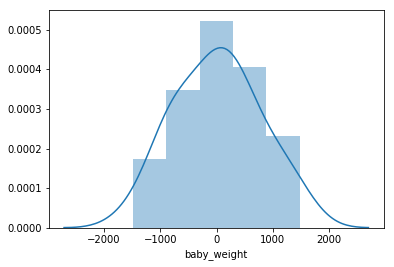

In [70]:
sns.distplot(resd)

In [71]:
r2_score(y_test, yfit)

0.09219409724252026